In [ ]:
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('mnist/', one_hot = False)

In [110]:
x_train = mnist.train.images
x_test = mnist.test.images
y_train = mnist.train.labels
y_test = mnist.test.labels

In [111]:
y_train = np.asarray(y_train, dtype = np.int32)
y_test = np.asarray(y_test, dtype = np.int32)

In [112]:
x_test.shape

(10000, 784)

Text(0.5, 1.0, 'Classe: 7')

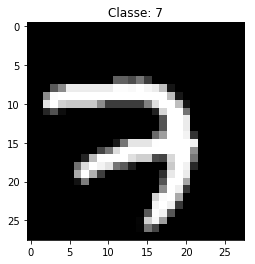

In [113]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_treinamento[0].reshape(28, 28), cmap = 'gray')
plt.title('Classe: ' + str(y_train[0]))

In [114]:
import tensorflow as tf

In [115]:
def create_network(features, labels, mode):
    input = tf.reshape(features['x'], [-1, 28, 28, 1])
    
    # receives [batch_size, 28, 28, 1]
    # returns [batch_size, 28, 28, 32]
    convolution1 = tf.layers.conv2d(inputs = input, filters = 32, kernel_size = [5,5], activation = tf.nn.relu,
                                 padding = 'same')
    
    # receives [batch_size, 28, 28, 1]
    # returns [batch_size, 14, 14, 32]
    pooling1 = tf.layers.max_pooling2d(inputs = convolution1, pool_size = [2,2], strides = 2)
    
    # receives [batch_size, 14, 14, 32]
    # returns [batch_size, 14, 14, 64]
    convolution2 = tf.layers.conv2d(inputs = pooling1, filters = 64, kernel_size = [5,5], activation = tf.nn.relu,
                                  padding = 'same')
    
    # receives [batch_size, 14, 14, 64]
    # returns [batch_size, 7, 7, 64]
    pooling2 = tf.layers.max_pooling2d(inputs = convolution2, pool_size = [2,2], strides = 2)
    
    # receives [batch_size, 7, 7, 64]
    # returns [batch_size, 3136]
    flattening = tf.reshape(pooling2, [-1, 7 * 7 * 64])
    
    # 3136 inputs -> 1024 neurons on hidden layer -> 10 outputs
    # receives [batch_size, 3136]
    # returns [batch_size, 1024]
    dense = tf.layers.dense(inputs = flattening, units = 1024, activation = tf.nn.relu)
    
    # dropout
    dropout =  tf.layers.dropout(inputs = dense, rate = 0.2, training = mode == tf.estimator.ModeKeys.TRAIN)
    
    # receives [batch_size, 1024]
    # returns [batch_size, 10]
    output = tf.layers.dense(inputs = dropout, units = 10)
    
    predictions = tf.argmax(output, axis = 1)
    
    if(mode == tf.estimator.ModeKeys.PREDICT):
        return tf.estimator.EstimatorSpec(mode = mode, predictions = predictions)  
    
    losses = tf.losses.sparse_softmax_cross_entropy(labels = labels, logits = output)
    
    if(mode == tf.estimator.ModeKeys.TRAIN):
        optimizer = tf.train.AdamOptimizer(learning_rate = 0.001)
        train = optimizer.minimize(losses, global_step = tf.train.get_global_step())
        return tf.estimator.EstimatorSpec(mode = mode, loss = losses, train_op = train)
    
    if(mode == tf.estimator.ModeKeys.EVAL):
        eval_metrics_ops = {'accuracy': tf.metrics.accuracy(labels = labels, predictions = predictions)}
        return tf.estimator.EstimatorSpec(mode = mode, loss = losses, eval_metric_ops = eval_metrics_ops)         

In [ ]:
classifier = tf.estimator.Estimator(model_fn = create_network)

In [123]:
train_function = tf.estimator.inputs.numpy_input_fn(x = {'x': x_train}, y = y_train, 
                                                        batch_size= 128, num_epochs= None, shuffle= True)
classifier.train(input_fn = train_function, steps = 2000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\diego\AppData\Local\Temp\tmp50se6tou\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1000 into C:\Users\diego\AppData\Local\Temp\tmp50se6tou\model.ckpt.
INFO:tensorflow:loss = 0.033836316, step = 1001
INFO:tensorflow:global_step/sec: 1.87008
INFO:tensorflow:loss = 0.016413944, step = 1101 (53.476 sec)
INFO:tensorflow:global_step/sec: 1.87824
INFO:tensorflow:loss = 0.04313025, step = 1201 (53.240 sec)
INFO:tensorflow:global_step/sec: 1.99169
INFO:tensorflow:loss = 0.015618335, step = 1301 (50.360 sec)
INFO:tensorflow:global_step/sec: 1.83042
INFO:tensorflow:loss = 0.006344838, step = 1401 (54.482 sec)
INFO:tensorflow:global_step/sec: 1.91656
INFO:tensorflow:loss = 0.018813241, step = 1501 (52.176 

In [125]:
test_function = tf.estimator.inputs.numpy_input_fn(x = {'x': x_test}, y = y_test, num_epochs = 1, shuffle = False)

results = classifier.evaluate(input_fn = test_function)
results

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-01-17-19:14:51
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\diego\AppData\Local\Temp\tmp50se6tou\model.ckpt-3000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-01-17-19:15:03
INFO:tensorflow:Saving dict for global step 3000: accuracy = 0.991, global_step = 3000, loss = 0.029747501
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 3000: C:\Users\diego\AppData\Local\Temp\tmp50se6tou\model.ckpt-3000


{'accuracy': 0.991, 'loss': 0.029747501, 'global_step': 3000}

In [126]:
x_image_test = x_teste[0]
x_image_test = x_image_test.reshape(1,-1)
x_image_test.shape

(1, 784)

In [ ]:
prediction_function = tf.estimator.inputs.numpy_input_fn(x = {'x': x_image_test}, shuffle = False)
pred = list(classifier.predict(input_fn = prediction_function))

In [128]:
pred[0]

7

Text(0.5, 1.0, 'Classe prevista: 7')

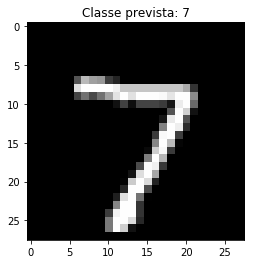

In [129]:
plt.imshow(x_image_test.reshape((28,28)), cmap = 'gray')
plt.title('Classe prevista: ' + str(pred[0]))